## Importing Necessary Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the csv file into a panda dataframe

In [20]:
data = pd.read_csv("CarPrice_Assignment.csv")
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

## Before we begin linear regression, we must pre-process the data to make it more suitable for the regression model to work on 
### Converting categorical data to numerical data

In [21]:
X = data.drop('price', axis=1)  # replace 'target_variable' with your actual target variable
y = data['price']
data_cat = X.select_dtypes(include=['object'])  
data_num = X.select_dtypes(include=['number'])
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_num_norm = (data_num - mean) / std

data_cat_proc = pd.get_dummies(data_cat, drop_first=True) 
boolean_cols = data_cat_proc.columns[data_cat_proc.dtypes == 'bool']
data_cat_proc[boolean_cols] = data_cat_proc[boolean_cols].astype(int)
data_proc = pd.concat([data_num_norm, data_cat_proc], axis=1) 

### Splitting given data into a dataset for training and another for testing

In [22]:

test_size = 0.4

n_samples = data_proc.shape[0]

n_test_samples = int(n_samples * test_size)
print(n_test_samples)

indices = np.arange(n_samples)
np.random.shuffle(indices)

# Split the data into training and testing sets
train_indices = indices[n_test_samples:]
test_indices = indices[:n_test_samples]

X_train = data_proc.iloc[train_indices]
y_train = y.iloc[train_indices]


X_test = data_proc.iloc[test_indices]
y_test = y.iloc[test_indices]
mse_values = []

61


## Performing Linear Regression
### Creating a class LinearRegression, setting its properties and defining its functions

In [23]:
class LinearRegression:
    def __init__(self, lr = 0.01, n_iters = 6000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            delw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            delb = (1/n_samples)*np.sum(y_predicted - y)
            self.weights = self.weights - self.lr*delw
            self.bias = self.bias - self.lr*delb
            mse = np.mean((y_predicted - y) ** 2)
            mse_values.append(mse)
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

### Creating Object to run linear regression on data

[17549.13848394  8365.38654617 10918.97328214 24130.64297181
 14992.99806316 17893.36130698  7169.33393271  7228.06804815
  7537.89105    28053.73636652  8412.48824438 22204.4182773
 14789.58802077 14777.17636033  8782.46790091  6025.97530927
  6994.45926019  6634.97462568 16538.50555325  9368.95601439
  9620.22593853 31468.39510717  5949.60631998  8057.02243902
  7205.55497477 17779.14427832  7398.20711082 14115.41642886
 12394.05268334 27428.76633487 27047.52046253  6520.06304825
 17340.96240158 27275.10471521 16900.37465056  8461.10776703
 20806.34164897 10717.97061703  5149.70645054 17151.58465642
 14321.22187181  7182.49703249  8681.66146067 10785.50013793
  7263.71298178  8799.6959462   5437.68463465  5852.75181024
 28441.70584722 16261.95195606 28173.56405079  7403.84409014
 19748.88970516 14142.38866884  6593.4861464  17751.16399568
 12148.95874542 12432.88289305  9430.50570242  9414.11657555
  8112.77027832]


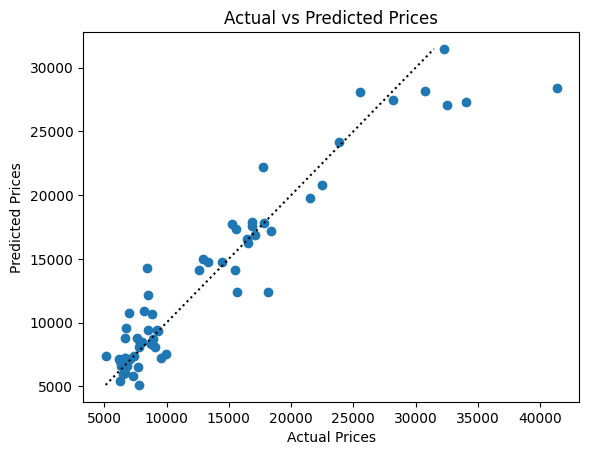

In [26]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)
print(predictions)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(predictions)], [min(y_test), max(predictions)], 'k:')
plt.show()

## Depiction of change in MSE over iterations

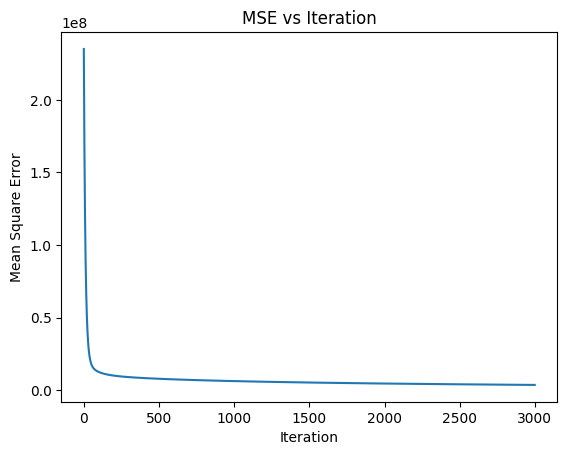

In [25]:
plt.plot(mse_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Iteration')
plt.show()